In [40]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.model_selection import train_test_split

In [14]:
X, y_true = make_blobs ( n_samples =400, centers =4,
cluster_std=0.60, random_state=0)

rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))


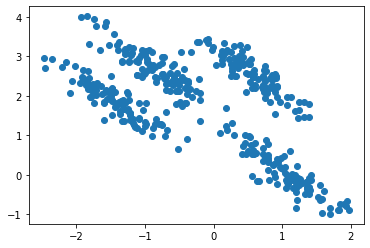

In [15]:
plt.scatter(X_stretched[:, 0], X_stretched[:, 1])

In [16]:
clf = SpectralClustering(n_clusters=4).fit(X_stretched)

In [17]:
clf.labels_

array([3, 1, 1, 3, 1, 2, 0, 0, 1, 0, 2, 0, 3, 1, 0, 3, 1, 0, 3, 0, 0, 1,
       2, 3, 3, 2, 2, 0, 3, 3, 3, 3, 1, 3, 0, 2, 0, 3, 0, 3, 1, 2, 0, 3,
       0, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 3, 0, 3, 1,
       0, 2, 0, 3, 1, 3, 1, 2, 3, 0, 0, 1, 2, 0, 1, 3, 0, 2, 3, 1, 1, 3,
       1, 3, 1, 3, 3, 1, 1, 2, 3, 0, 0, 3, 2, 0, 3, 3, 1, 3, 3, 3, 3, 1,
       1, 1, 3, 1, 2, 3, 2, 1, 2, 2, 0, 0, 0, 2, 3, 2, 3, 0, 0, 3, 2, 3,
       2, 1, 3, 0, 2, 3, 2, 1, 0, 1, 1, 2, 1, 3, 3, 1, 0, 1, 0, 3, 0, 3,
       2, 1, 0, 1, 0, 1, 3, 1, 2, 0, 1, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 3,
       3, 1, 3, 3, 3, 2, 1, 3, 2, 1, 2, 0, 3, 2, 3, 3, 2, 0, 2, 2, 2, 3,
       0, 3, 3, 1, 0, 0, 2, 3, 1, 2, 3, 2, 3, 3, 0, 0, 2, 0, 0, 2, 3, 2,
       1, 3, 2, 1, 0, 1, 0, 2, 3, 2, 3, 1, 3, 3, 2, 0, 0, 3, 3, 1, 0, 3,
       3, 2, 0, 3, 2, 3, 0, 1, 1, 3, 1, 3, 2, 2, 3, 3, 0, 2, 3, 0, 1, 1,
       2, 3, 3, 3, 3, 3, 0, 3, 3, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 2,
       3, 3, 0, 3, 0, 0, 3, 3, 1, 3, 0, 0, 0, 1, 2,

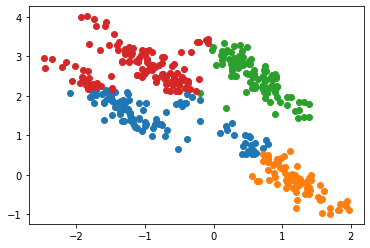

In [18]:
X_0 = X_stretched[clf.labels_==0]
X_1 = X_stretched[clf.labels_==1]
X_2 = X_stretched[clf.labels_==2]
X_3 = X_stretched[clf.labels_==3]

plt.scatter(X_0[:, 0], X_0[:, 1])
plt.scatter(X_1[:, 0], X_1[:, 1])
plt.scatter(X_2[:, 0], X_2[:, 1])
plt.scatter(X_3[:, 0], X_3[:, 1])

## metrics by variant

### homogeneity

In [19]:
homogeneity_score(y_true, clf.labels_)

0.6711073541209106

### completeness

In [20]:
completeness_score(y_true, clf.labels_)

0.6785308374965295

### v-measure

In [21]:
v_measure_score(y_true, clf.labels_)

0.6747986799277192

## Alternative model 1 (changing affinity parameter)

In [22]:
clf = SpectralClustering(n_clusters=4, affinity="nearest_neighbors").fit(X_stretched)

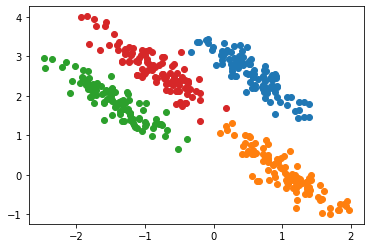

In [23]:
X_0 = X_stretched[clf.labels_==0]
X_1 = X_stretched[clf.labels_==1]
X_2 = X_stretched[clf.labels_==2]
X_3 = X_stretched[clf.labels_==3]

plt.scatter(X_0[:, 0], X_0[:, 1])
plt.scatter(X_1[:, 0], X_1[:, 1])
plt.scatter(X_2[:, 0], X_2[:, 1])
plt.scatter(X_3[:, 0], X_3[:, 1])

In [24]:
homogeneity_completeness_v_measure(y_true, clf.labels_)

(0.9797477926204754, 0.97980062680703, 0.9797742090014836)

## Alternative model 2 (adding more clusters)

In [28]:
clf = SpectralClustering(n_clusters=6).fit(X_stretched)

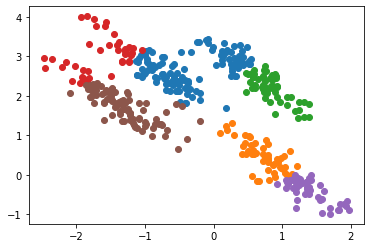

In [33]:
X_0 = X_stretched[clf.labels_==0]
X_1 = X_stretched[clf.labels_==1]
X_2 = X_stretched[clf.labels_==2]
X_3 = X_stretched[clf.labels_==3]
X_4 = X_stretched[clf.labels_==4]
X_5 = X_stretched[clf.labels_==5]

plt.scatter(X_0[:, 0], X_0[:, 1])
plt.scatter(X_1[:, 0], X_1[:, 1])
plt.scatter(X_2[:, 0], X_2[:, 1])
plt.scatter(X_3[:, 0], X_3[:, 1])
plt.scatter(X_4[:, 0], X_4[:, 1])
plt.scatter(X_5[:, 0], X_5[:, 1])

In [30]:
homogeneity_completeness_v_measure(y_true, clf.labels_)

(0.7821099969212004, 0.6313334000503513, 0.6986797838917201)

## Alternative model 3 (less clusters with nearestt neighbours affinity)

In [34]:
clf = SpectralClustering(n_clusters=3, affinity="nearest_neighbors").fit(X_stretched)

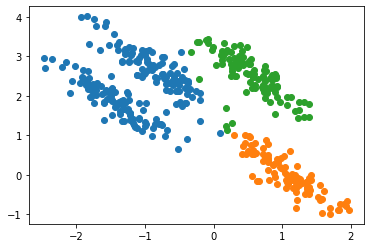

In [35]:
X_0 = X_stretched[clf.labels_==0]
X_1 = X_stretched[clf.labels_==1]
X_2 = X_stretched[clf.labels_==2]

plt.scatter(X_0[:, 0], X_0[:, 1])
plt.scatter(X_1[:, 0], X_1[:, 1])
plt.scatter(X_2[:, 0], X_2[:, 1])

In [38]:
homogeneity_completeness_v_measure(y_true, clf.labels_)

(0.6787265699714619, 0.9069351881663482, 0.7764089740973238)

# Чи є розбиття стабiльним на пiдвибiрках даних?

In [41]:
X_train, X_test, y_true_train, y_true_test = train_test_split(X_stretched, y_true, test_size=0.6)

In [42]:
clf = SpectralClustering(n_clusters=4, affinity="nearest_neighbors").fit(X_train)

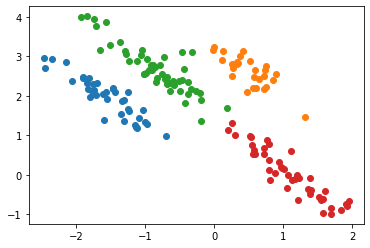

In [44]:
X_0 = X_train[clf.labels_==0]
X_1 = X_train[clf.labels_==1]
X_2 = X_train[clf.labels_==2]
X_3 = X_train[clf.labels_==3]

plt.scatter(X_0[:, 0], X_0[:, 1])
plt.scatter(X_1[:, 0], X_1[:, 1])
plt.scatter(X_2[:, 0], X_2[:, 1])
plt.scatter(X_3[:, 0], X_3[:, 1])

# Стабільний відносно підвибірок